<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/Agglomerative_Balance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Balance.csv to Balance.csv


In [ ]:
import io
data=pd.read_csv(io.StringIO(uploaded['Balance.csv'].decode('utf-8')),header=None)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[0]=le.fit_transform(data[0])
data.head()

,0,1,2,3,4
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [ ]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
data_norm=norm.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
p=PCA(n_components=2)
X=p.fit_transform(data_norm)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_matrix=linkage(X,method='complete')

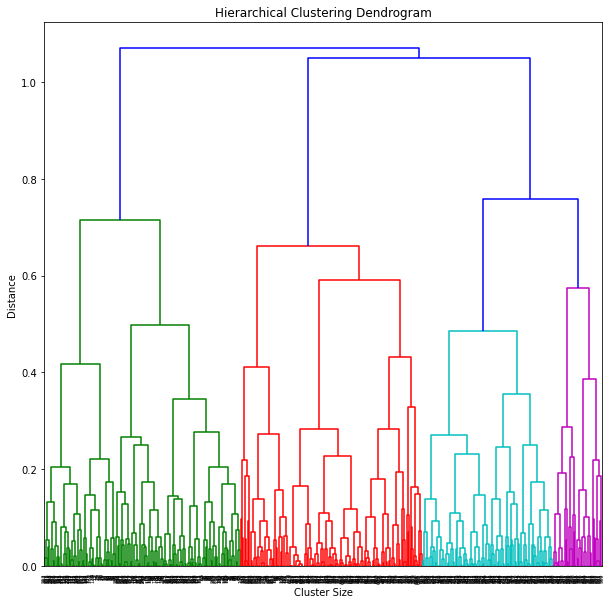

In [ ]:
plt.figure(figsize=(10,10))
dendrogram(link_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

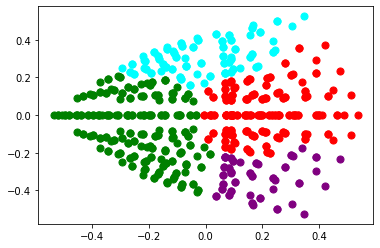

In [ ]:
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean')
cluster.fit(X)
labels=cluster.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='cyan')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')

In [ ]:
from sklearn.metrics import silhouette_score 
for n in [2,3,4,5,6]:
    cluster=AgglomerativeClustering(n_clusters=n,linkage='complete') 
    silhouette_avg=silhouette_score(X, cluster.fit_predict(X))
    print("For n_clusters =", n,"The average silhouette_score is :", round(silhouette_avg,2))

For n_clusters = 2 The average silhouette_score is : 0.33
For n_clusters = 3 The average silhouette_score is : 0.36
For n_clusters = 4 The average silhouette_score is : 0.31
For n_clusters = 5 The average silhouette_score is : 0.3
For n_clusters = 6 The average silhouette_score is : 0.29
